In [20]:
import re
import ast
import argparse
import matplotlib.pyplot as plt
import pandas as pd

# Choose a readable sans-serif font
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 10  # Adjust font size as needed

def extract_json_data_from_text(text):
    json_pattern = re.compile(r'\{.*?\}')
    json_data_list = []

    matches = json_pattern.finditer(text)
    for match in matches:
        try:
            json_data = ast.literal_eval(match.group())
            json_data_list.append(json_data)
        except (SyntaxError, ValueError) as e:
            print(f"Error evaluating JSON-like string: {e}")
            print(f"Problematic string: {match.group()}")

    return json_data_list

def collect_values_by_key(json_data_list, keys_to_collect):
    values_by_key = {key: [] for key in keys_to_collect}

    unique_epochs = set()

    for json_data in json_data_list:
        for key, value in json_data.items():
            if key in keys_to_collect:
                # Special handling for 'epoch' key to exclude duplicates
                if key == 'epoch' and value in unique_epochs:
                    continue
                values_by_key[key].append(value)

                if key == 'epoch':
                    unique_epochs.add(value)

    return values_by_key

def plot_rouge_subplots(values_by_key):
    rouge_keys = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    values_by_key['epoch'] = values_by_key['epoch'][:-1]

    # Use a muted pastel color palette
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']

    for i, key in enumerate(rouge_keys):
        row = i // 2
        col = i % 2
        values = values_by_key[key]
        axs[row, col].plot(values_by_key['epoch'], values, marker='o', linestyle='-', label=key, color=colors[i])
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel(f'{key} Scores')
        axs[row, col].set_title(f'{key} Scores Over Epochs')
        axs[row, col].grid(True)
        axs[row, col].legend()

    plt.tight_layout()
    plt.show()

def plot_loss(values_by_key):
    plt.figure()
    values = values_by_key['loss']
    plt.plot(values_by_key['epoch'], values, marker='o', linestyle='-', color='tab:red', label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

def print_results_table(values_by_key):
    df = pd.DataFrame({key: values_by_key[key] for key in ['epoch', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']})
    print(df.to_string())  # Use to_string() for cleaner printed table

def main(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    json_data_list = extract_json_data_from_text(text)

    keys_to_collect = ['loss', 'epoch', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'gen_len', 'eval_loss', 'eval_runtime', 'train_runtime', 'train_loss']
    values_by_key = collect_values_by_key(json_data_list, keys_to_collect)

    plot_rouge_subplots(values_by_key)
    plot_loss(values_by_key)


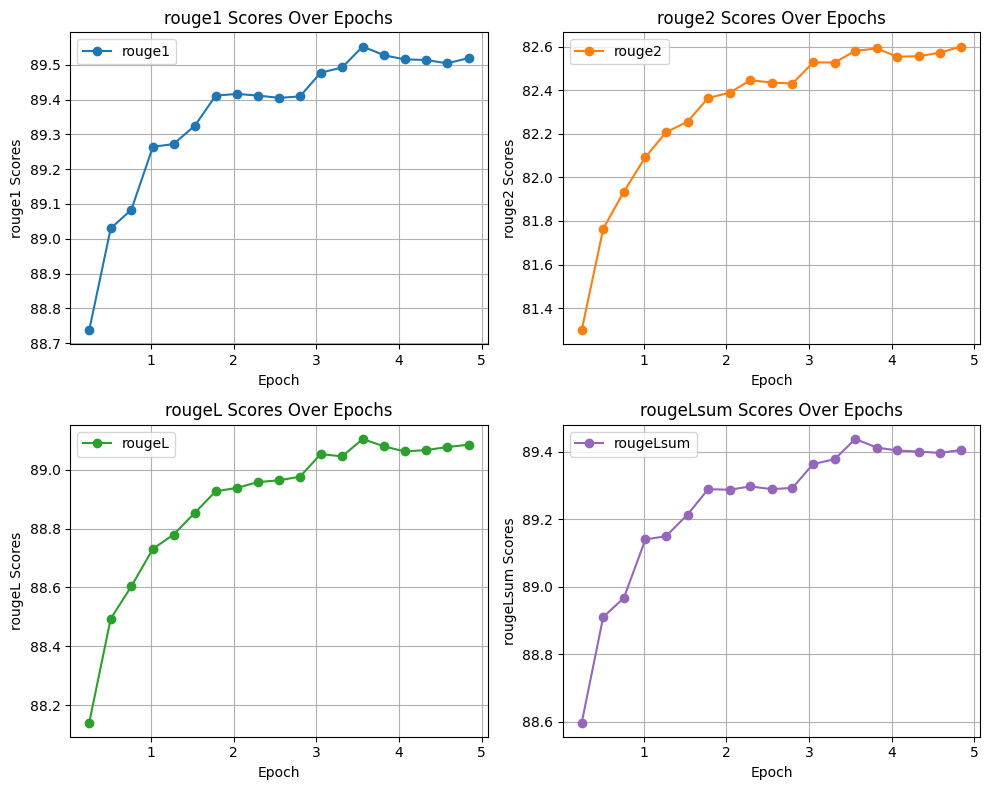

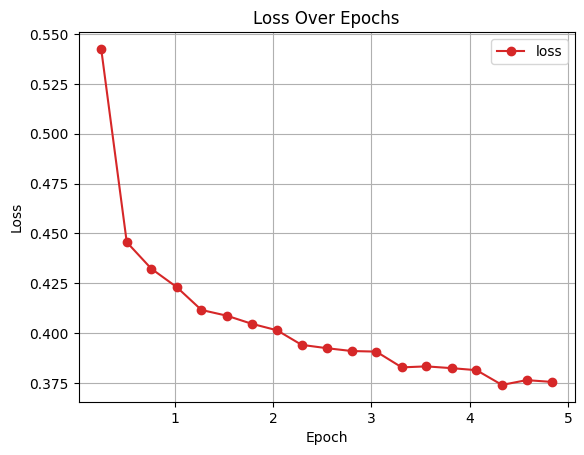

In [22]:
main("../results/codellama_qlora_nf4_r1.log")

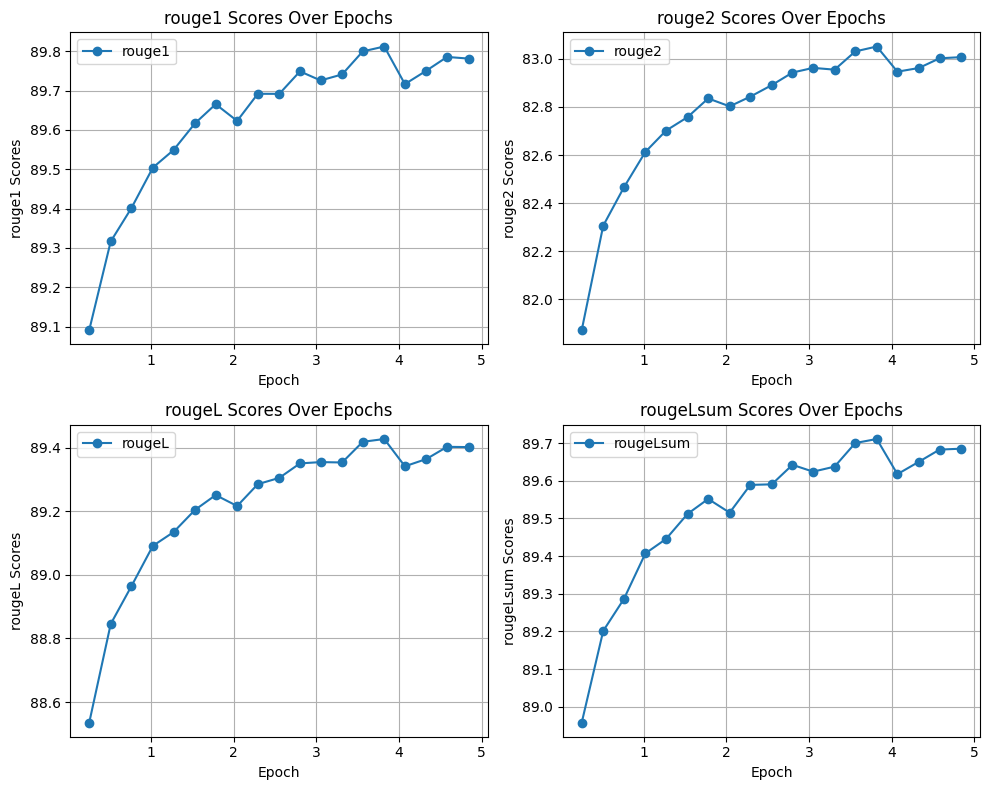

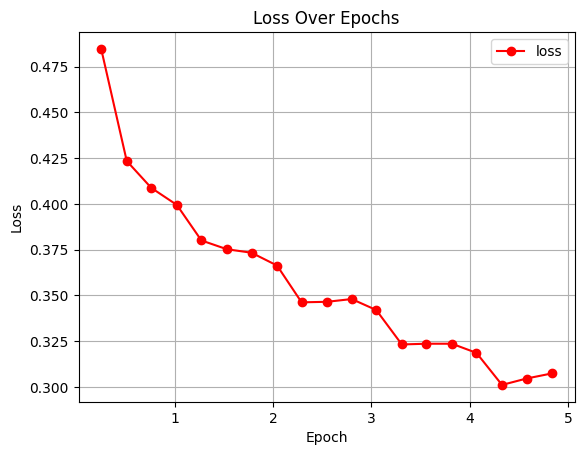

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.0912  81.8722  88.5355    88.9580
1    0.51  89.3165  82.3064  88.8455    89.2013
2    0.76  89.4012  82.4654  88.9641    89.2859
3    1.02  89.5042  82.6132  89.0911    89.4069
4    1.27  89.5489  82.7017  89.1343    89.4453
5    1.53  89.6169  82.7577  89.2042    89.5117
6    1.78  89.6655  82.8356  89.2508    89.5515
7    2.04  89.6230  82.8027  89.2164    89.5151
8    2.29  89.6920  82.8431  89.2851    89.5888
9    2.55  89.6918  82.8910  89.3049    89.5903
10   2.80  89.7490  82.9432  89.3504    89.6421
11   3.05  89.7259  82.9627  89.3545    89.6239
12   3.31  89.7412  82.9553  89.3533    89.6373
13   3.56  89.7998  83.0311  89.4183    89.6999
14   3.82  89.8122  83.0516  89.4271    89.7106
15   4.07  89.7166  82.9469  89.3413    89.6173
16   4.33  89.7508  82.9622  89.3642    89.6502
17   4.58  89.7857  83.0025  89.4025    89.6825
18   4.84  89.7815  83.0074  89.4017    89.6849


In [3]:
main("codellama_qlora_nf4_r8.log")

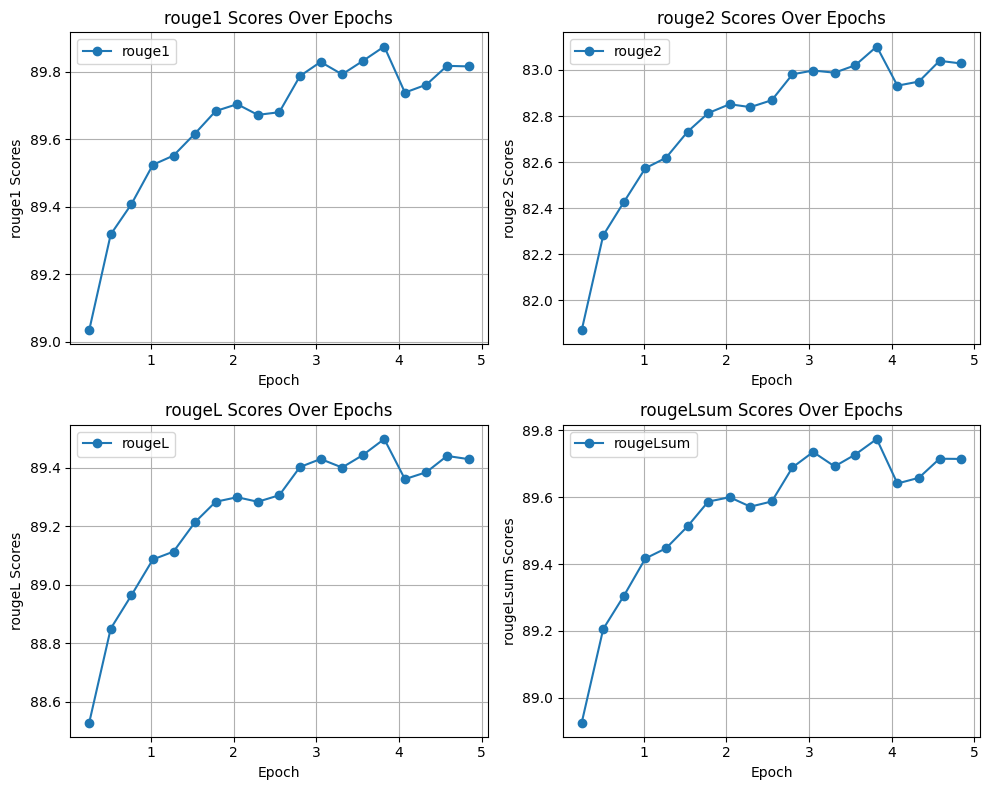

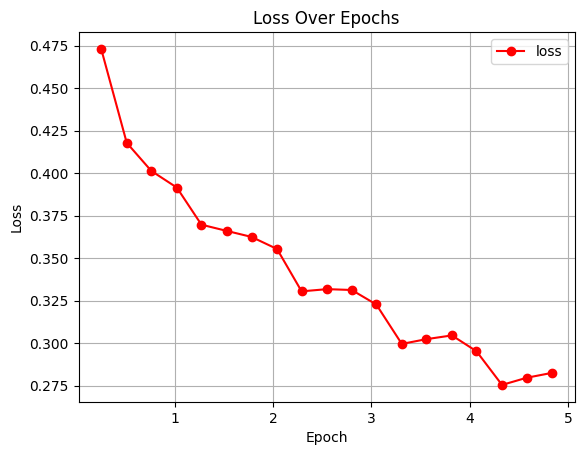

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.0349  81.8702  88.5285    88.9255
1    0.51  89.3182  82.2816  88.8501    89.2055
2    0.76  89.4077  82.4261  88.9639    89.3048
3    1.02  89.5244  82.5734  89.0867    89.4166
4    1.27  89.5517  82.6185  89.1136    89.4470
5    1.53  89.6170  82.7314  89.2143    89.5125
6    1.78  89.6836  82.8126  89.2842    89.5867
7    2.04  89.7040  82.8512  89.2998    89.5999
8    2.29  89.6723  82.8386  89.2842    89.5716
9    2.55  89.6802  82.8687  89.3066    89.5872
10   2.80  89.7873  82.9811  89.4031    89.6891
11   3.05  89.8291  82.9976  89.4306    89.7352
12   3.31  89.7923  82.9882  89.4014    89.6921
13   3.56  89.8319  83.0204  89.4438    89.7276
14   3.82  89.8748  83.1019  89.4990    89.7741
15   4.07  89.7383  82.9318  89.3616    89.6410
16   4.33  89.7618  82.9496  89.3855    89.6580
17   4.58  89.8175  83.0397  89.4411    89.7151
18   4.84  89.8159  83.0283  89.4301    89.7145


In [4]:
main("codellama_qlora_nf4_r16.log")

Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12acaf670>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12adf7a90>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12abf6490>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae50ac0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12adf77c0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12adf7fa0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae02ac0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae02ee0

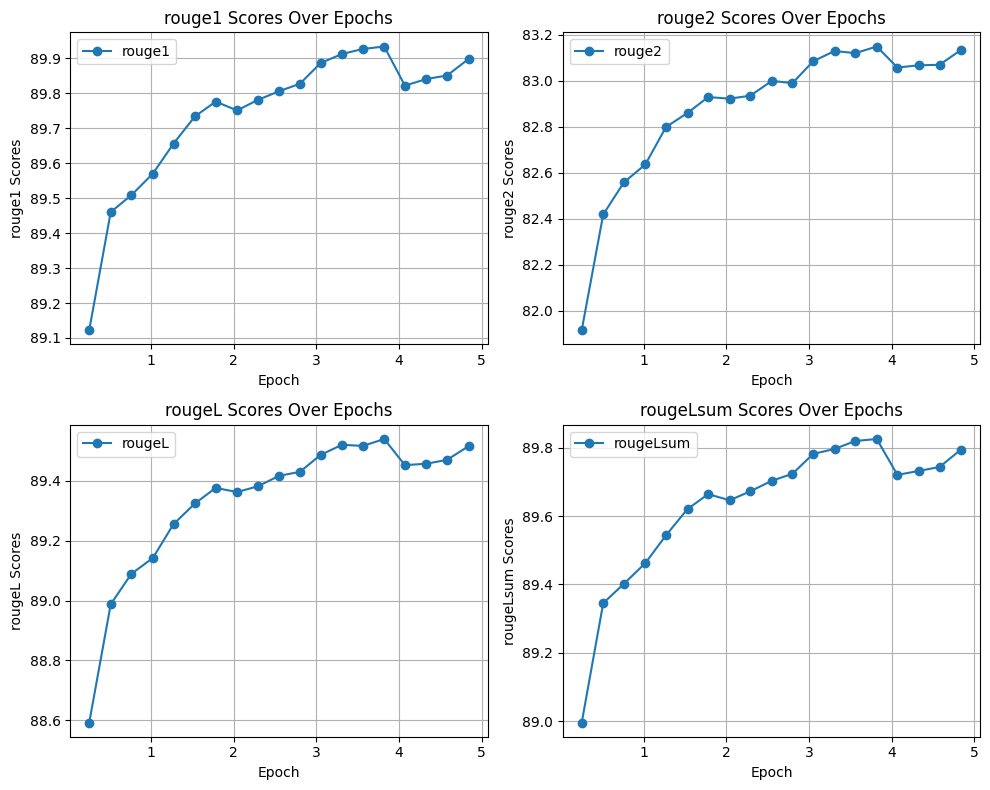

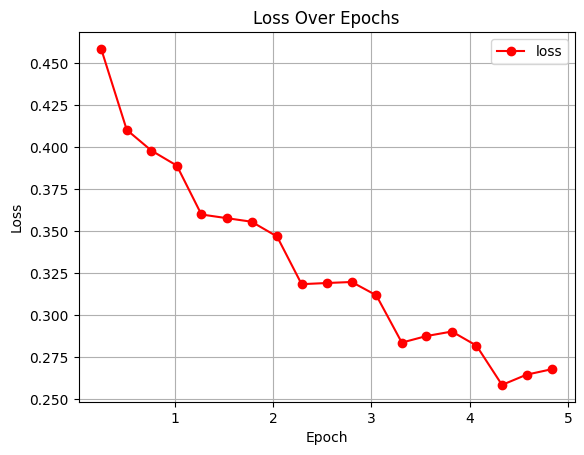

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.1227  81.9169  88.5929    88.9955
1    0.51  89.4600  82.4191  88.9874    89.3453
2    0.76  89.5084  82.5585  89.0891    89.4019
3    1.02  89.5699  82.6366  89.1419    89.4627
4    1.27  89.6558  82.7993  89.2549    89.5442
5    1.53  89.7337  82.8603  89.3239    89.6211
6    1.78  89.7757  82.9293  89.3757    89.6647
7    2.04  89.7506  82.9224  89.3618    89.6467
8    2.29  89.7807  82.9353  89.3811    89.6730
9    2.55  89.8056  82.9995  89.4161    89.7038
10   2.80  89.8270  82.9898  89.4293    89.7243
11   3.05  89.8861  83.0848  89.4858    89.7825
12   3.31  89.9120  83.1295  89.5197    89.7971
13   3.56  89.9262  83.1201  89.5156    89.8204
14   3.82  89.9333  83.1490  89.5388    89.8262
15   4.07  89.8214  83.0577  89.4516    89.7211
16   4.33  89.8404  83.0673  89.4564    89.7327
17   4.58  89.8504  83.0696  89.4693    89.7443
18   4.84  89.8975  83.1342  89.5148    89.7954


In [5]:
main("codellama_qlora_nf4_r32.log")

Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12af87220>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12af93f70>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12af7f370>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12afb1d90>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12afc3d90>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12afc3ee0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12afc3f70>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12afc53a0

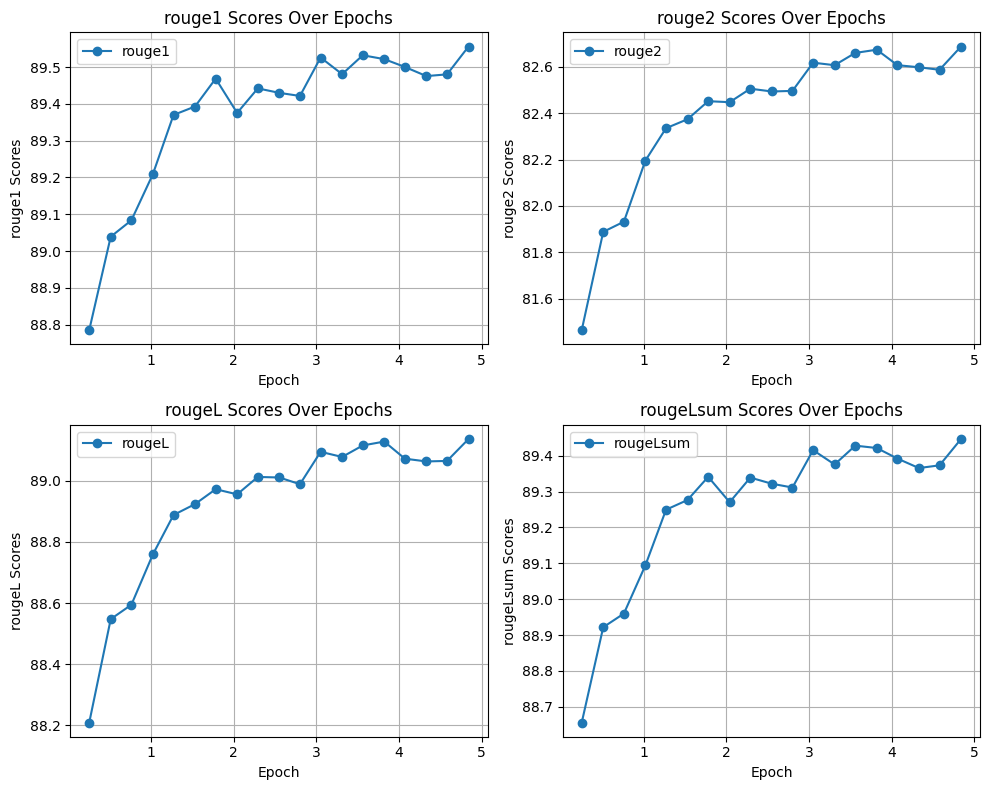

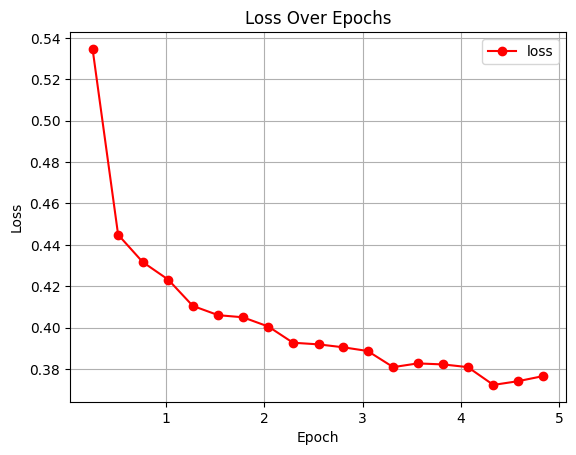

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  88.7852  81.4655  88.2083    88.6560
1    0.51  89.0389  81.8886  88.5472    88.9218
2    0.76  89.0835  81.9323  88.5943    88.9599
3    1.02  89.2089  82.1956  88.7593    89.0943
4    1.27  89.3699  82.3352  88.8884    89.2495
5    1.53  89.3928  82.3738  88.9241    89.2766
6    1.78  89.4686  82.4516  88.9729    89.3412
7    2.04  89.3754  82.4473  88.9561    89.2705
8    2.29  89.4421  82.5054  89.0131    89.3391
9    2.55  89.4299  82.4934  89.0113    89.3220
10   2.80  89.4215  82.4960  88.9893    89.3114
11   3.05  89.5260  82.6175  89.0954    89.4156
12   3.31  89.4807  82.6067  89.0786    89.3757
13   3.56  89.5321  82.6596  89.1163    89.4282
14   3.82  89.5216  82.6734  89.1290    89.4216
15   4.07  89.5003  82.6068  89.0729    89.3922
16   4.33  89.4755  82.5978  89.0639    89.3657
17   4.58  89.4802  82.5869  89.0656    89.3733
18   4.84  89.5559  82.6872  89.1374    89.4467


In [6]:
main("codellama_lora_int8_r1.log")

Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b0d0ac0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b0d0850>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b1509d0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b12e9d0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b150d00>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b0d0490>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b1370a0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b137b80

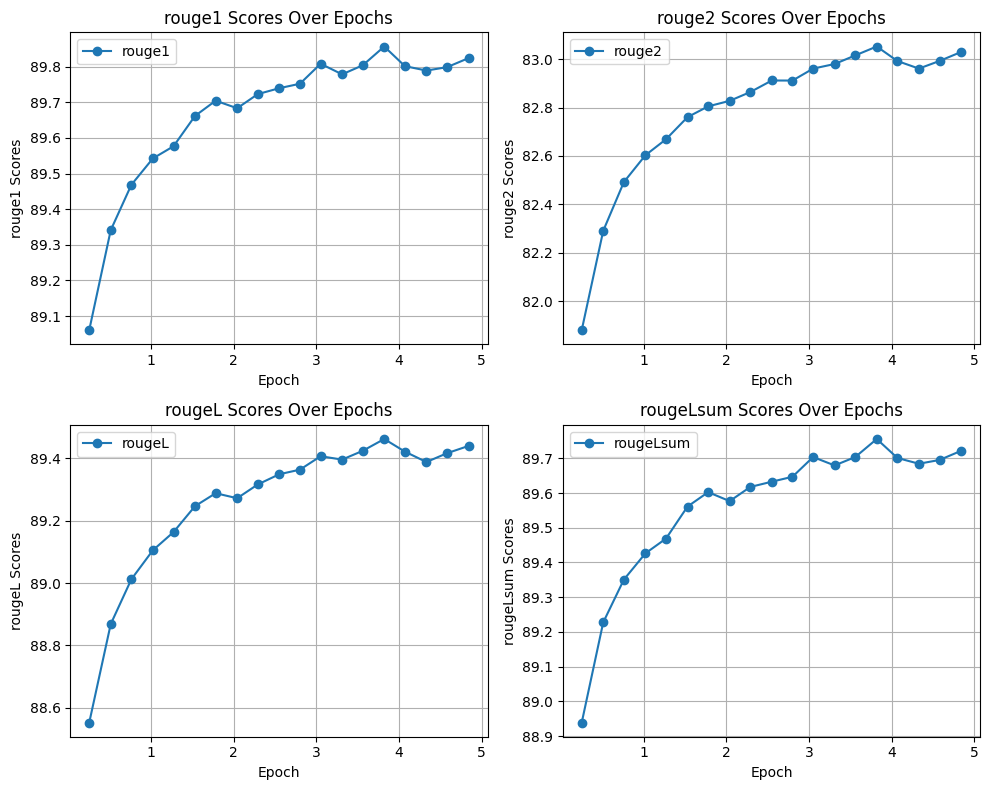

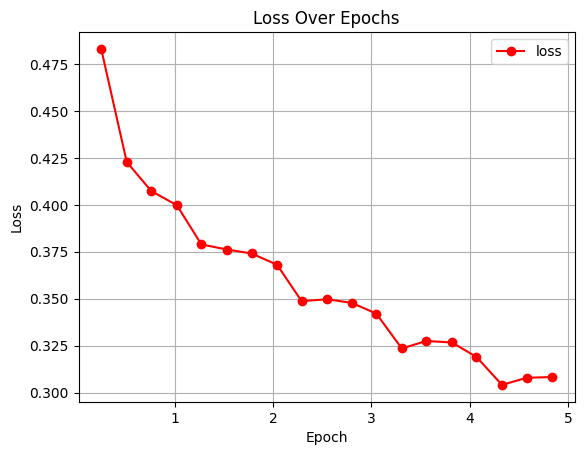

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.0607  81.8808  88.5530    88.9392
1    0.51  89.3410  82.2909  88.8685    89.2276
2    0.76  89.4685  82.4923  89.0123    89.3508
3    1.02  89.5424  82.6029  89.1051    89.4262
4    1.27  89.5766  82.6692  89.1634    89.4689
5    1.53  89.6617  82.7605  89.2465    89.5610
6    1.78  89.7045  82.8050  89.2880    89.6025
7    2.04  89.6833  82.8278  89.2719    89.5767
8    2.29  89.7230  82.8642  89.3161    89.6175
9    2.55  89.7396  82.9119  89.3488    89.6326
10   2.80  89.7521  82.9116  89.3635    89.6468
11   3.05  89.8082  82.9610  89.4065    89.7036
12   3.31  89.7785  82.9800  89.3957    89.6794
13   3.56  89.8039  83.0156  89.4239    89.7036
14   3.82  89.8566  83.0523  89.4617    89.7555
15   4.07  89.8015  82.9923  89.4213    89.7009
16   4.33  89.7891  82.9611  89.3879    89.6843
17   4.58  89.7986  82.9926  89.4162    89.6952
18   4.84  89.8240  83.0296  89.4395    89.7214


In [7]:
main("codellama_lora_int8_r8.log")

Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12b0f3460>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae65a90>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae65c70>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae6c820>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aeaca00>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aeac0a0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aeac6d0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aed82e0

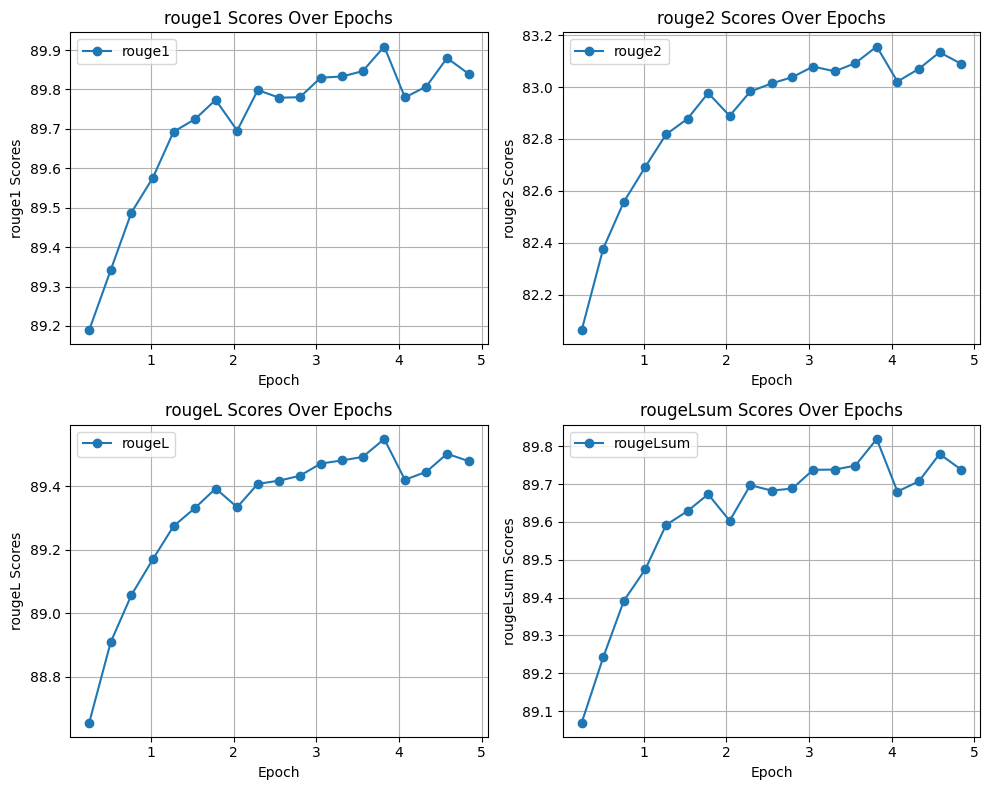

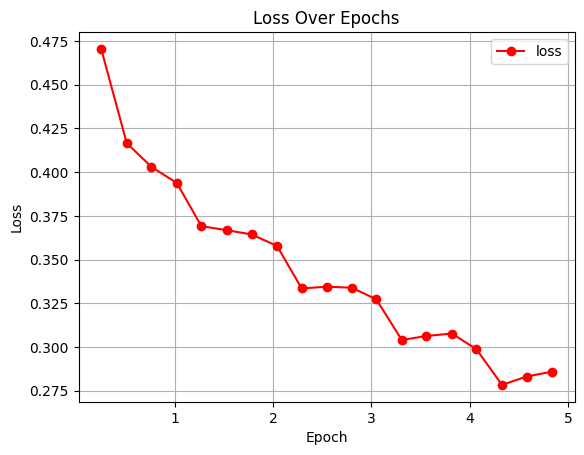

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.1895  82.0630  88.6557    89.0696
1    0.51  89.3419  82.3773  88.9087    89.2420
2    0.76  89.4875  82.5577  89.0568    89.3916
3    1.02  89.5761  82.6928  89.1696    89.4749
4    1.27  89.6927  82.8175  89.2736    89.5917
5    1.53  89.7247  82.8779  89.3310    89.6285
6    1.78  89.7737  82.9774  89.3922    89.6730
7    2.04  89.6958  82.8893  89.3334    89.6030
8    2.29  89.7985  82.9834  89.4068    89.6970
9    2.55  89.7791  83.0145  89.4171    89.6826
10   2.80  89.7805  83.0389  89.4323    89.6882
11   3.05  89.8299  83.0795  89.4707    89.7376
12   3.31  89.8330  83.0610  89.4806    89.7382
13   3.56  89.8467  83.0925  89.4917    89.7486
14   3.82  89.9091  83.1568  89.5480    89.8190
15   4.07  89.7798  83.0214  89.4196    89.6801
16   4.33  89.8076  83.0707  89.4450    89.7073
17   4.58  89.8799  83.1346  89.5015    89.7794
18   4.84  89.8399  83.0903  89.4786    89.7384


In [8]:
main("codellama_lora_int8_r16.log")

Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aa87b20>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aa87f40>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ad89160>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12ae86790>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12abcf5e0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aa872b0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aaa09a0>
Problematic string: {A.dtype}
Error evaluating JSON-like string: malformed node or string: <ast.Attribute object at 0x12aaa0ee0

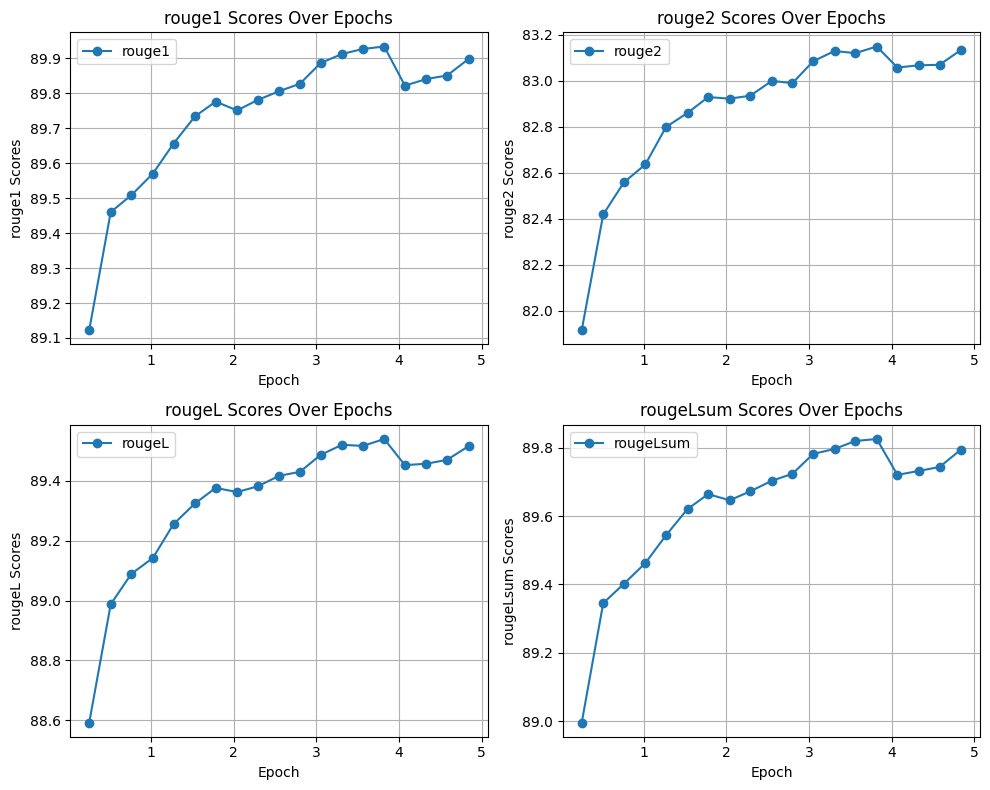

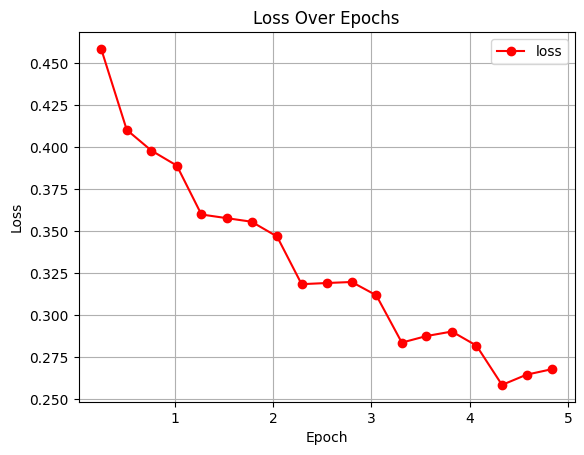

    epoch   rouge1   rouge2   rougeL  rougeLsum
0    0.25  89.1227  81.9169  88.5929    88.9955
1    0.51  89.4600  82.4191  88.9874    89.3453
2    0.76  89.5084  82.5585  89.0891    89.4019
3    1.02  89.5699  82.6366  89.1419    89.4627
4    1.27  89.6558  82.7993  89.2549    89.5442
5    1.53  89.7337  82.8603  89.3239    89.6211
6    1.78  89.7757  82.9293  89.3757    89.6647
7    2.04  89.7506  82.9224  89.3618    89.6467
8    2.29  89.7807  82.9353  89.3811    89.6730
9    2.55  89.8056  82.9995  89.4161    89.7038
10   2.80  89.8270  82.9898  89.4293    89.7243
11   3.05  89.8861  83.0848  89.4858    89.7825
12   3.31  89.9120  83.1295  89.5197    89.7971
13   3.56  89.9262  83.1201  89.5156    89.8204
14   3.82  89.9333  83.1490  89.5388    89.8262
15   4.07  89.8214  83.0577  89.4516    89.7211
16   4.33  89.8404  83.0673  89.4564    89.7327
17   4.58  89.8504  83.0696  89.4693    89.7443
18   4.84  89.8975  83.1342  89.5148    89.7954


In [9]:
main("codellama_lora_int8_r32.log")

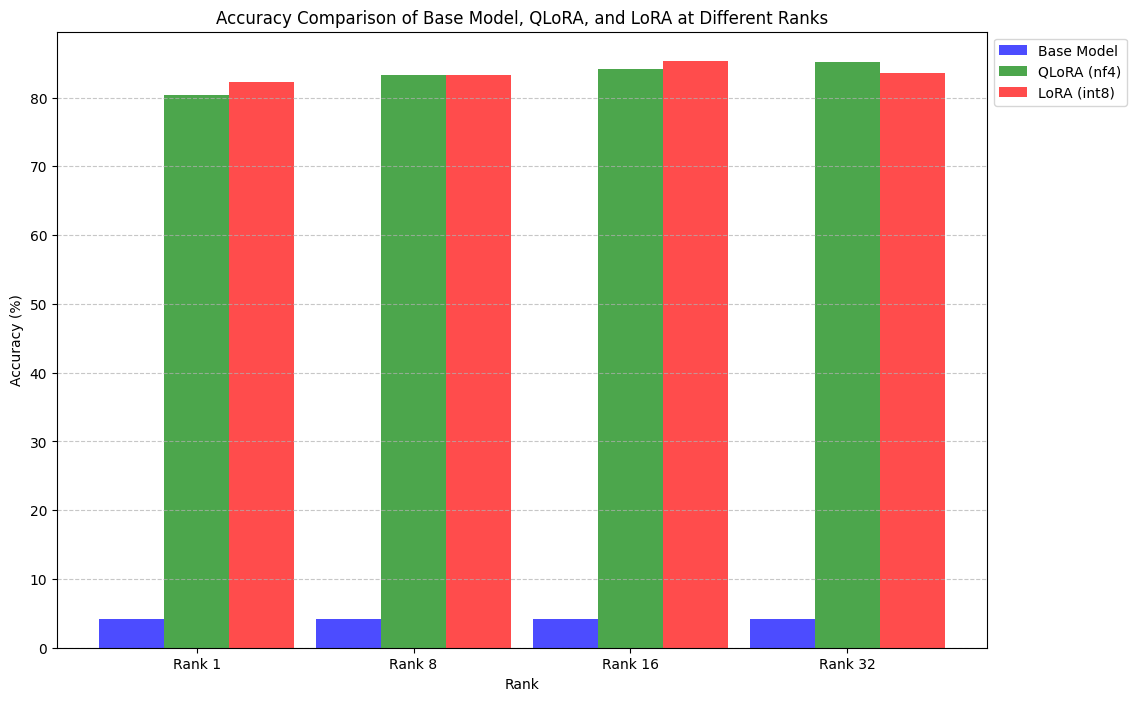

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data
ranks = ['Rank 1', 'Rank 8', 'Rank 16', 'Rank 32']
base_accuracy = [4.20] * len(ranks)
qlora_accuracy = [80.30, 83.20, 84.20, 85.20]
lora_accuracy = [82.20, 83.30, 85.30, 83.60]

# Plotting
bar_width = 0.3
bar_positions_base = np.arange(len(ranks))
bar_positions_qlora = bar_positions_base + bar_width
bar_positions_lora = bar_positions_base + 2 * bar_width

fig, ax = plt.subplots(figsize=(12, 8))

# Base Model
ax.bar(bar_positions_base, base_accuracy, bar_width, label='Base Model', color='blue', alpha=0.7)

# QLoRA (nf4)
ax.bar(bar_positions_qlora, qlora_accuracy, bar_width, label='QLoRA (nf4)', color='green', alpha=0.7)

# LoRA (int8)
ax.bar(bar_positions_lora, lora_accuracy, bar_width, label='LoRA (int8)', color='red', alpha=0.7)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize plot
ax.set_xticks(bar_positions_qlora)
ax.set_xticklabels(ranks)
ax.set_xlabel('Rank')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison of Base Model, QLoRA, and LoRA at Different Ranks')

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
